In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as sig

# DFT/FFT demo - comparing DFT and dot product

This demo illustrates the fundamentals of Discrete Fourier Transform (DFT) often called or implemented as FFT. DFT is the most widely used method for obtaining a frequency spectrum (with frequency on the x-axis and amplitude/power/magnituve on the y-axis) of a neural time series. 

We start by making a discrete time vector, at which the signal will be sampled. 

In [2]:
time = np.linspace(0.001,1, 1000) # One second of discrete time, sampled at 1000 Hz
time.shape

(1000,)

Now, we make a time series of Brownian noise (biorealistic) time series not unlike EEG/LFP, representing one trial of neural mass data


Text(0.5, 1.0, 'One second of Brownian noise (simulated neural time series)')

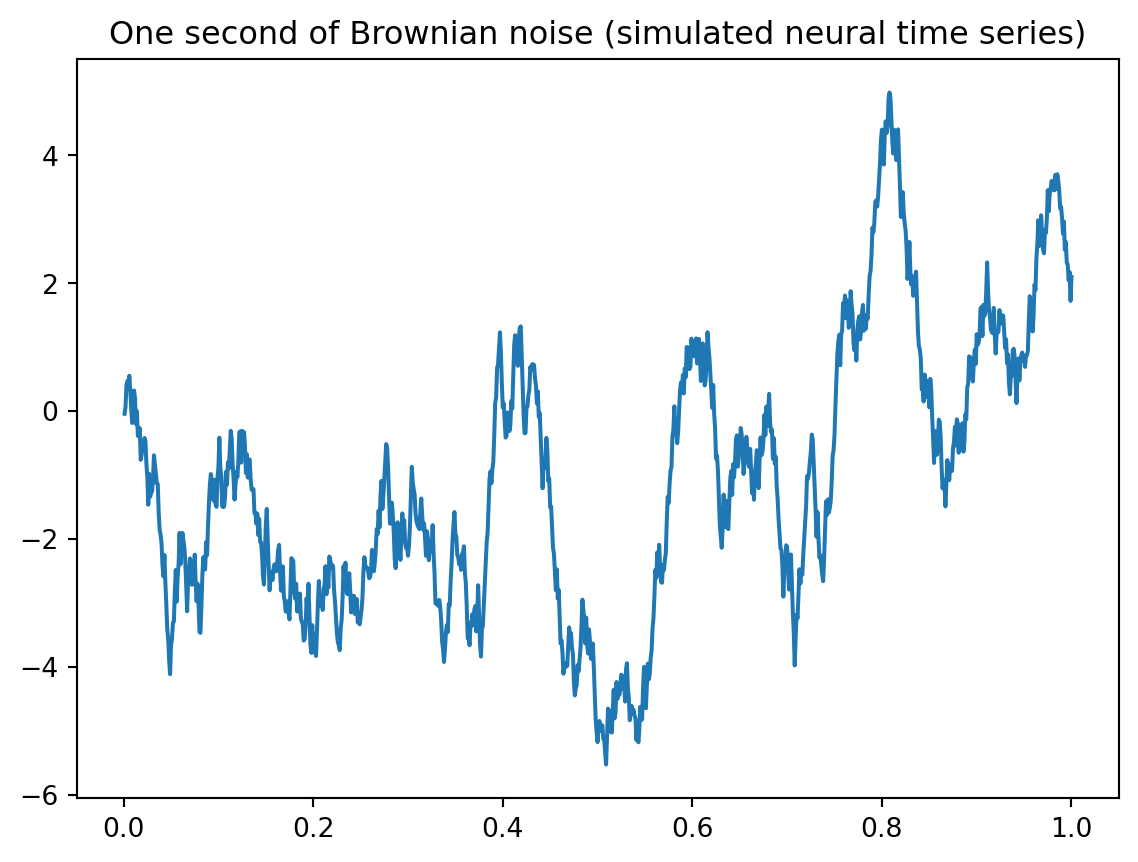

In [3]:
temp=np.random.uniform(low=0.0, high=1.0, size=(1000))-0.5
brownsig = np.cumsum(temp)
plt.plot(time, brownsig)
plt.title('One second of Brownian noise (simulated neural time series)')

Now we make 3 simple signals, to be added to the brownian noise.

Text(0.5, 1.0, 'The test signal, a sum of 6, 11, and 13 Hz sines/cosines')

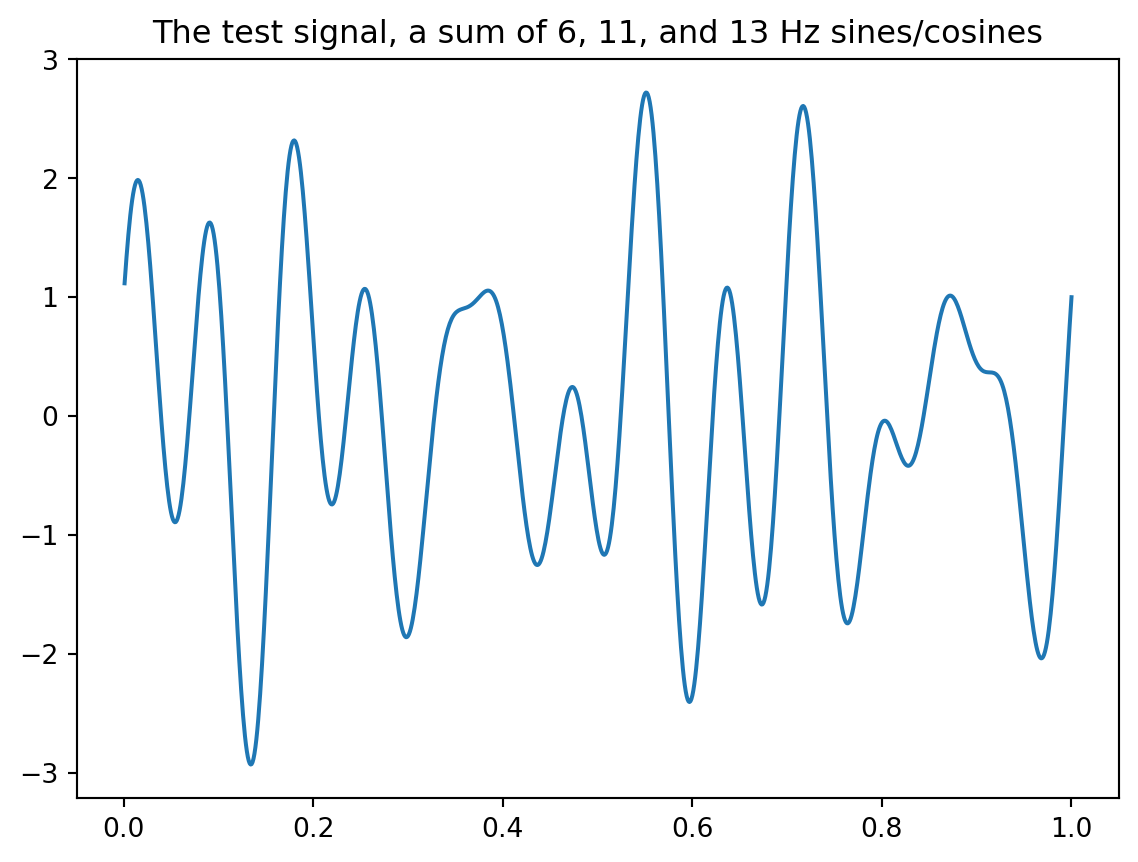

In [4]:
Sin6Hz = np.sin(2*np.pi*time*6) # a 6 Hz sine wave
Cos11Hz = np.cos(2*np.pi*time*11) # a 11 Hz cosine wave
Sin13Hz = np.sin(2*np.pi*time*13) # a 13 Hz sine wave

sumsig = Sin6Hz + Cos11Hz + Sin13Hz
plt.plot(time, sumsig)
plt.title('The test signal, a sum of 6, 11, and 13 Hz sines/cosines')

The sum of the three test signals, two sinoids, one cosinoid is now added to the Brownian noise

Text(0.5, 1.0, 'The Brownian noise plus the three test signals')

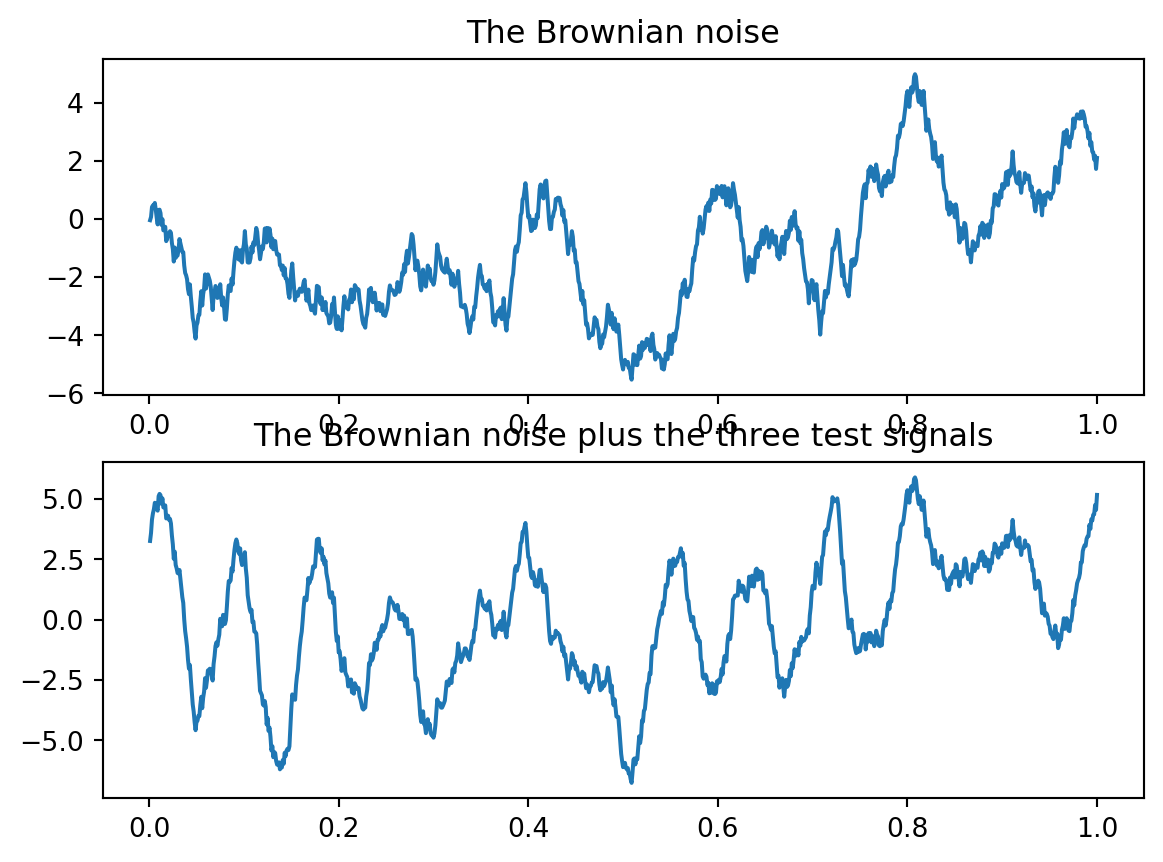

In [5]:
testsig1  = brownsig-np.mean(brownsig) # zero-centered Brownian noise
testsig = testsig1 + sumsig*2 # multiply sum of sine/cosine signals by 2 to make it more prominent

fig,ax=plt.subplots(2,1)
ax[0].plot(time, brownsig)
ax[0].set_title('The Brownian noise')
ax[1].plot(time, testsig)
ax[1].set_title('The Brownian noise plus the three test signals')


Now, we compute the Discrete Fourier Transform, resulting in a complex spectrum with real (cosine-base) and imaginary (sine-base) components. In most programming environments, this is just one line of code, and yields complex numbers, corresponding to the fit of sine and cosine templates for each frequency, with the data. More about this below. 


In [6]:
complexspectrum = np.fft.fft(testsig)

We have a 1-sec segment, which means the frequency resolution is 1 Hz; sampled at 1000 Hz, the frequency axis goes from 0 Hz to 500 Hz (half the sample rate, called the Nyquist Frequency). 

See Matt Carrick's excellent explanation here: [https://www.wavewalkerdsp.com/2022/03/16/dft-frequency-resolution-explained/](https://www.wavewalkerdsp.com/2022/03/16/dft-frequency-resolution-explained/) 


In [7]:
faxis = np.arange(0,500) # the frequency axis, from 0 to 500 Hz, in 1 Hz steps
print(faxis.shape,faxis[:3],'...to...',faxis[-3:])

(500,) [0 1 2] ...to... [497 498 499]


Plot the resulting spectra, one for the real part, one for the imaginary part, and the (combined) amplitude spectrum. Here, we plot only frequencies between 0 and 30 Hz for speed and ease. 

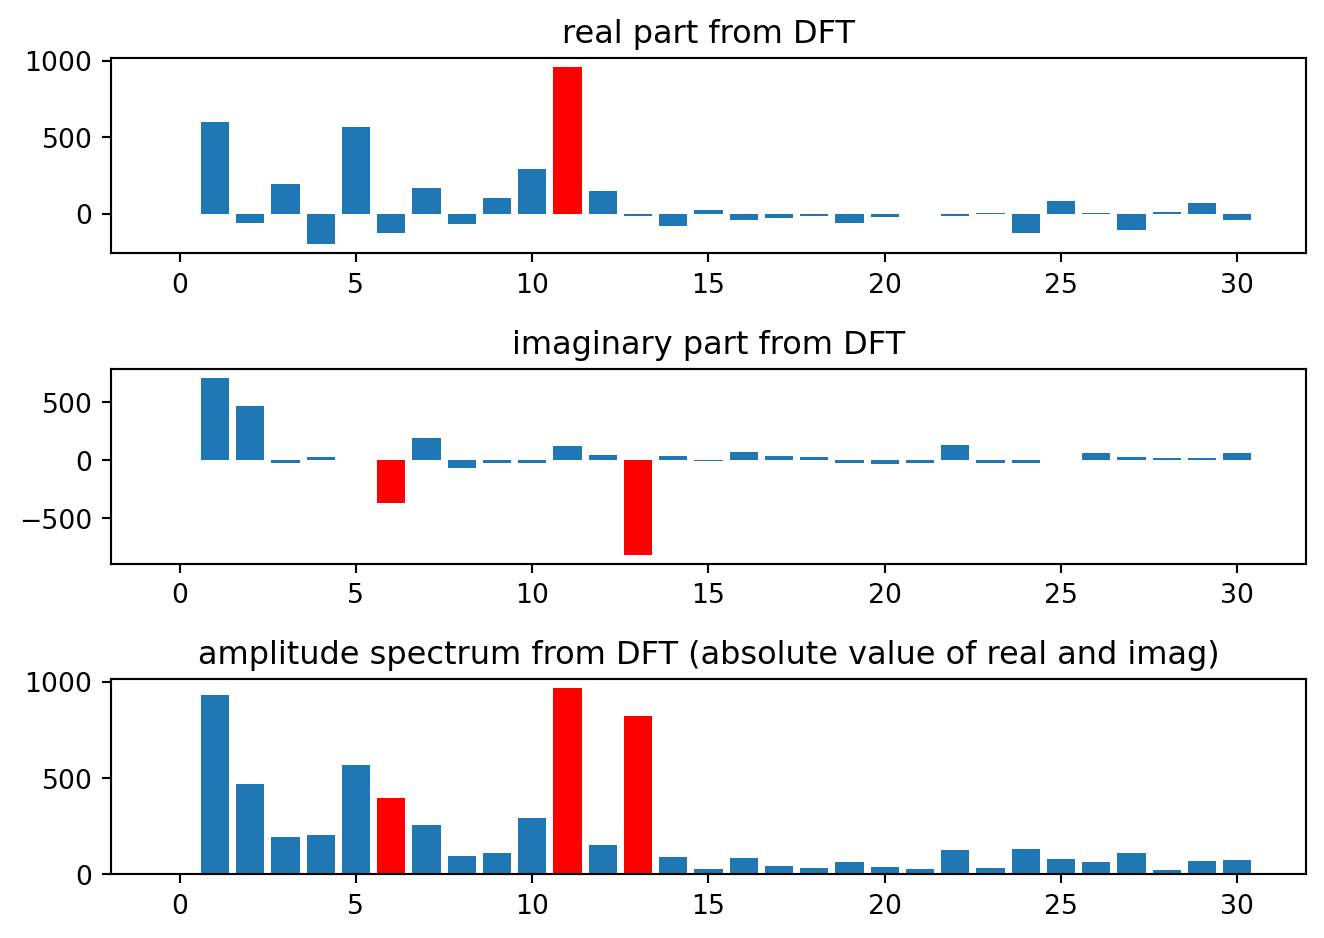

In [8]:
fig,ax=plt.subplots(3,1)
ax[0].bar(faxis[0:31], np.real(complexspectrum[0:31]))
ax[0].bar([11], np.real(complexspectrum[[11]]), color=['red'])
ax[0].set_title('real part from DFT') # the real part

ax[1].bar(faxis[0:31], np.imag(complexspectrum[0:31]))
ax[1].bar([6,13], np.imag(complexspectrum[[6,13]]), color=['red','red'])
ax[1].set_title('imaginary part from DFT') # the imaginary part

ax[2].bar(faxis[0:31], np.abs(complexspectrum[0:31]))
ax[2].bar([6,11,13], np.abs(complexspectrum[[6,11,13]]), color=['red']*3)
ax[2].set_title('amplitude spectrum from DFT (absolute value of real and imag)') # the absolute value
plt.tight_layout()

Now, let's examine the inner workings of the DFT: Instead of computing the DFT, we compute by hand (OK not really by hand) the dot product of each cosine template (for each frequency) with the data.   
- [Wikipedia: Dot Product](https://en.wikipedia.org/wiki/Dot_product). 

This dot product should look like the real part (the cosine component) of the DFT. The dot product can be thought of as a correlation between a template and the data. It has a greater value when the data happen to look like the template (here, sine and cosine functions at different frequencies) and a lower value when template and data are differentlin time course. We highlight the frequency of the cosine wave we put into the Brownian noise test signal in red.


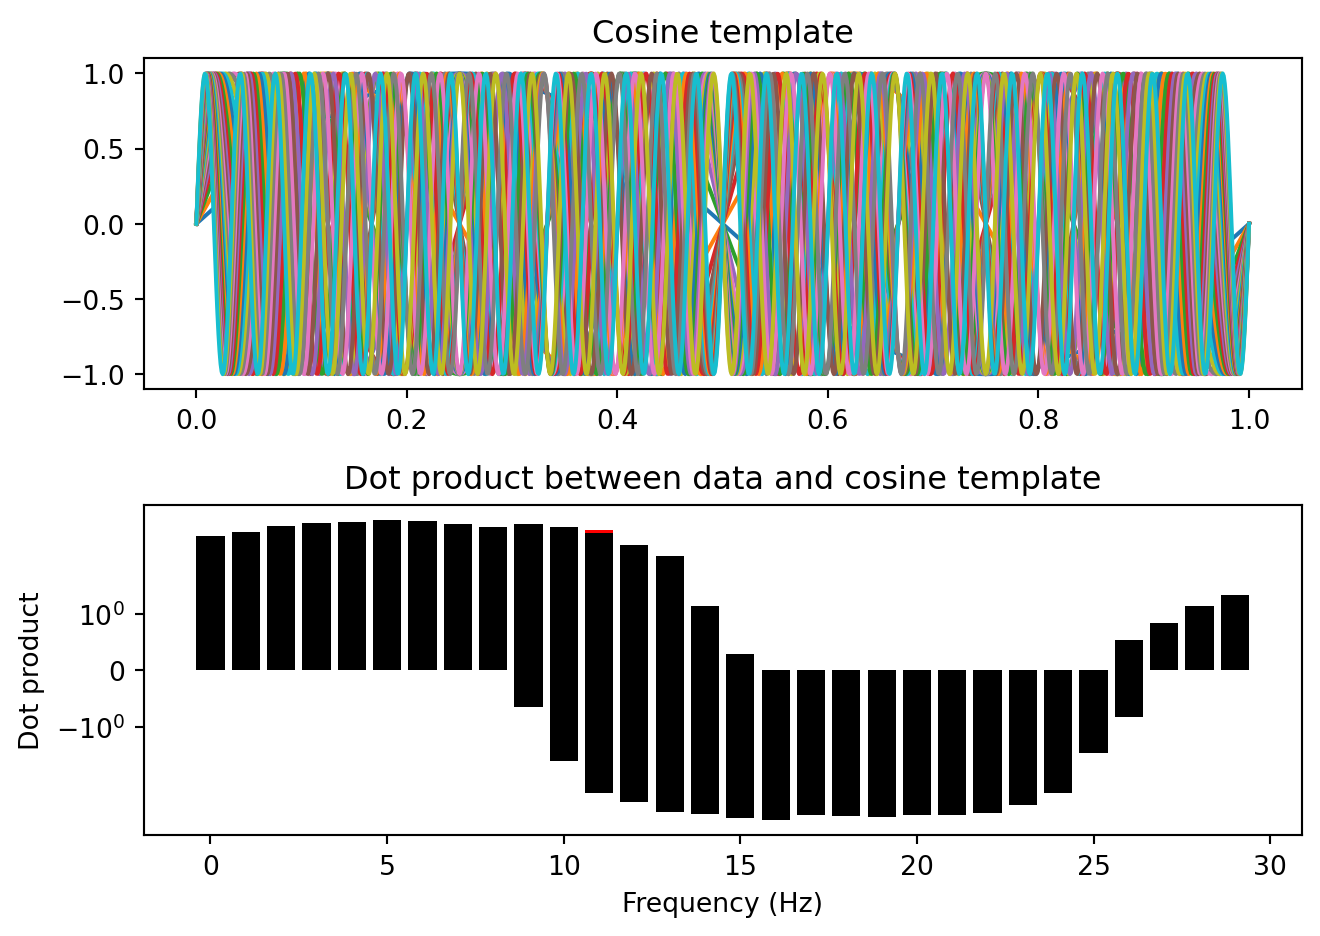

In [9]:
fig = plt.figure()
time = np.linspace(0, 1, num=1000) # generate time values

for frequency in range(1, 31):
    cosdot = testsig*np.cos(time*2*np.pi*frequency) # calculate dot product
    plt.subplot(2,1,1)
    plt.plot(time, np.sin(time*2*np.pi*frequency))
    plt.title('Cosine template')
    plt.subplot(2,1,2)
    plt.bar(range(frequency), cosdot[:frequency], color='k')
    if frequency == 11:
        plt.bar(frequency, cosdot[frequency], color='r')
    plt.title('Dot product between data and cosine template')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Dot product')
    plt.yscale('symlog') # set y-axis scale
    #plt.pause(1)

plt.tight_layout()
plt.show()

Now we do this again, but this time computing the dot product of each sine wave template with the data. 
(Note that the sign is opposite to the built-in DFT algorithm because of a Matlab convention.
 https://www.mathworks.com/help/signal/ug/discrete-fourier-transform.html )


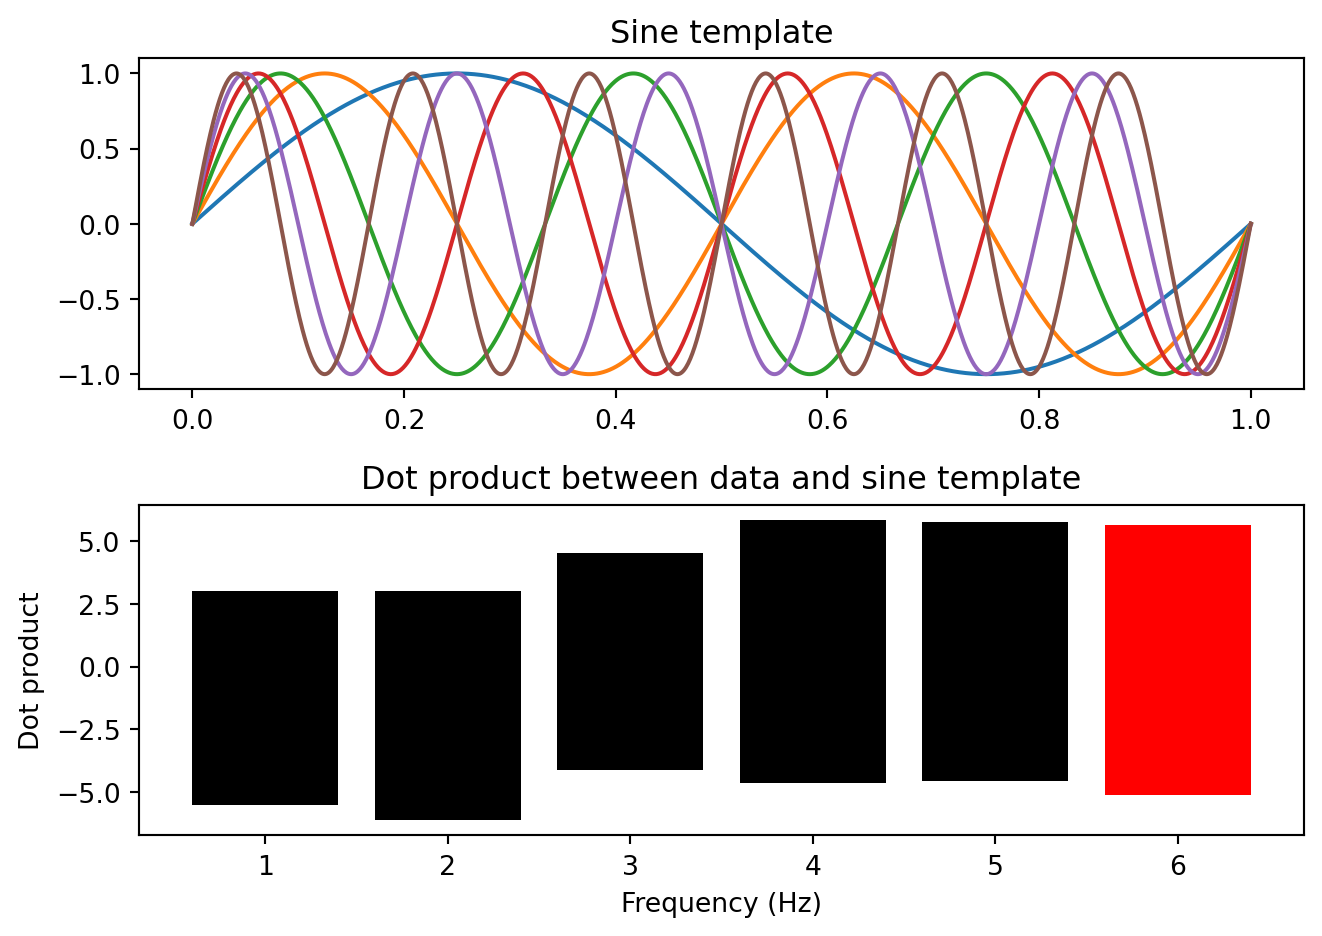

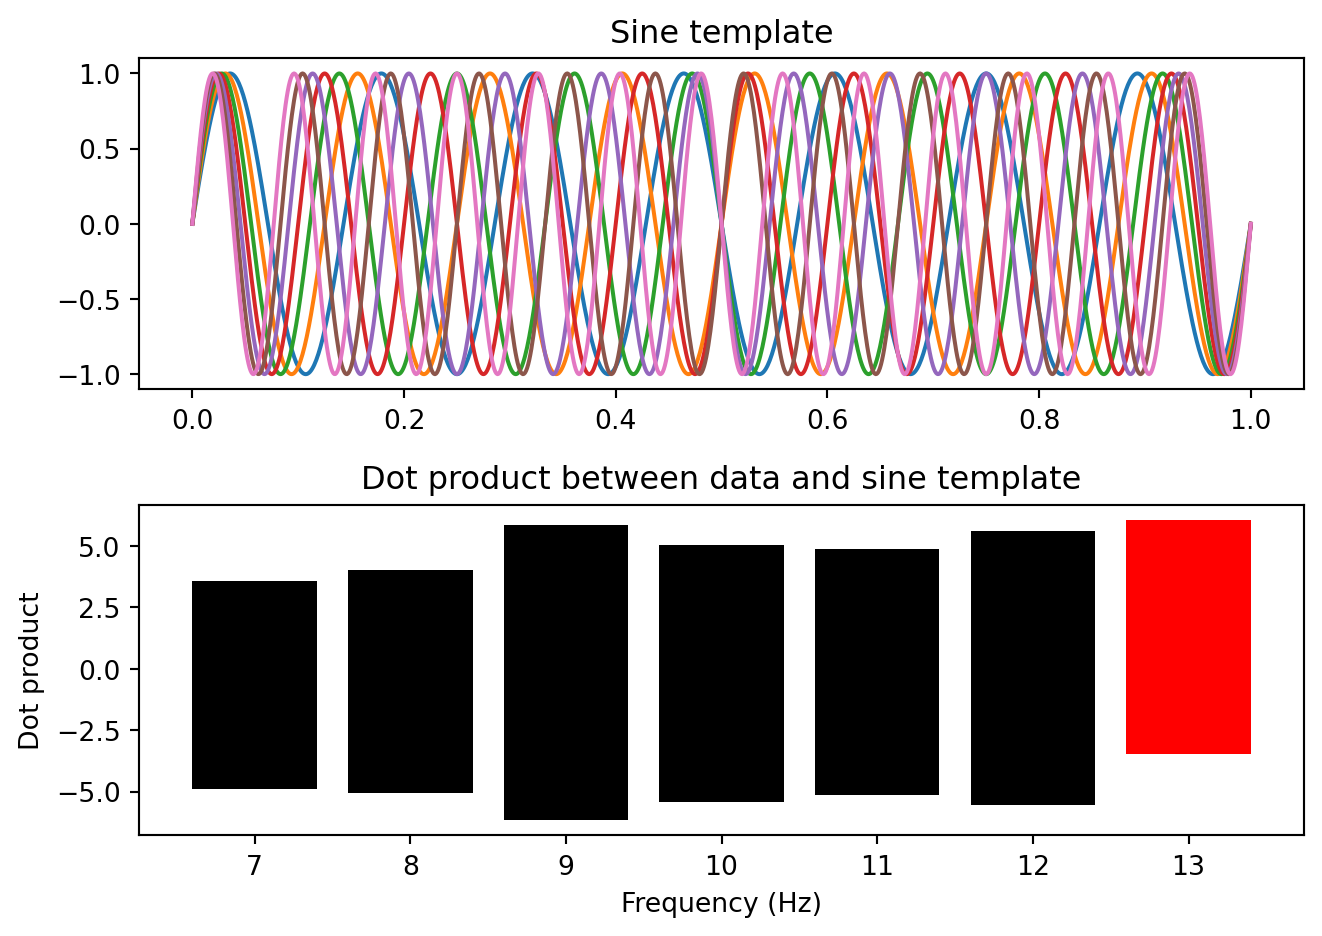

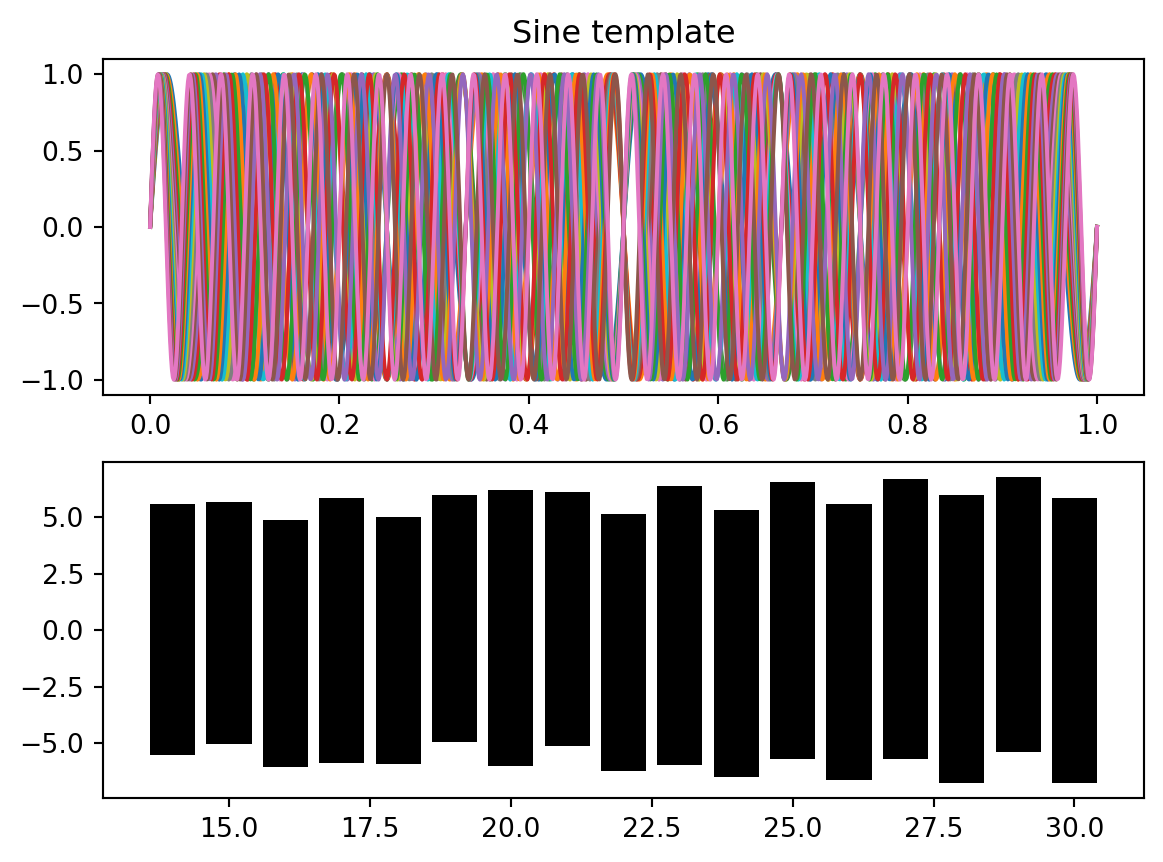

In [10]:
fig = plt.figure() 
for frequency in range(1, 31):
    sindot = testsig * np.sin(time * 2 * np.pi * frequency) 
    plt.subplot(2,1,1) 
    plt.plot(time, np.sin(time * 2 * np.pi * frequency)) 
    plt.title('Sine template') 
    plt.subplot(2,1,2) 
    plt.bar(frequency, sindot, color='k') 
    if frequency in [6, 13]: 
        plt.bar(frequency, sindot, color='r') 
        plt.title('Dot product between data and sine template') 
        plt.xlabel('Frequency (Hz)') 
        plt.ylabel('Dot product')
        #plt.pause(1) 
        plt.tight_layout()
        plt.show()

Just like for the built-in DFT algorith,m we now calculate the amplitude spectrum by taking the modulus (absolute value) of the sine and cosine dotproducts. The absolute value for each frequency is simply the square root of the sum of the squares of the cosine dot product and sine dot products. Note that the resulting spectrum is very similar to the built-in DFT (FFT) function that matlab uses. Small differences are owed to slight difference in implementation in the buil-in algorithm. This concludes this demo. The goal is for you now have a better intuition of the inner workings of DFT/FFT algorithms applied, as they can be thought of as a frequency-wise application of sine and cosine filters to the data. There are a few more interesting aspects, including how the length (duration) of the time segment affects the DFT. There is a demo on that in this collection (introto_DFTuncertainty.mlx). Check it out. 


In [11]:
dotprodspec  = cosdot + 1j*sindot


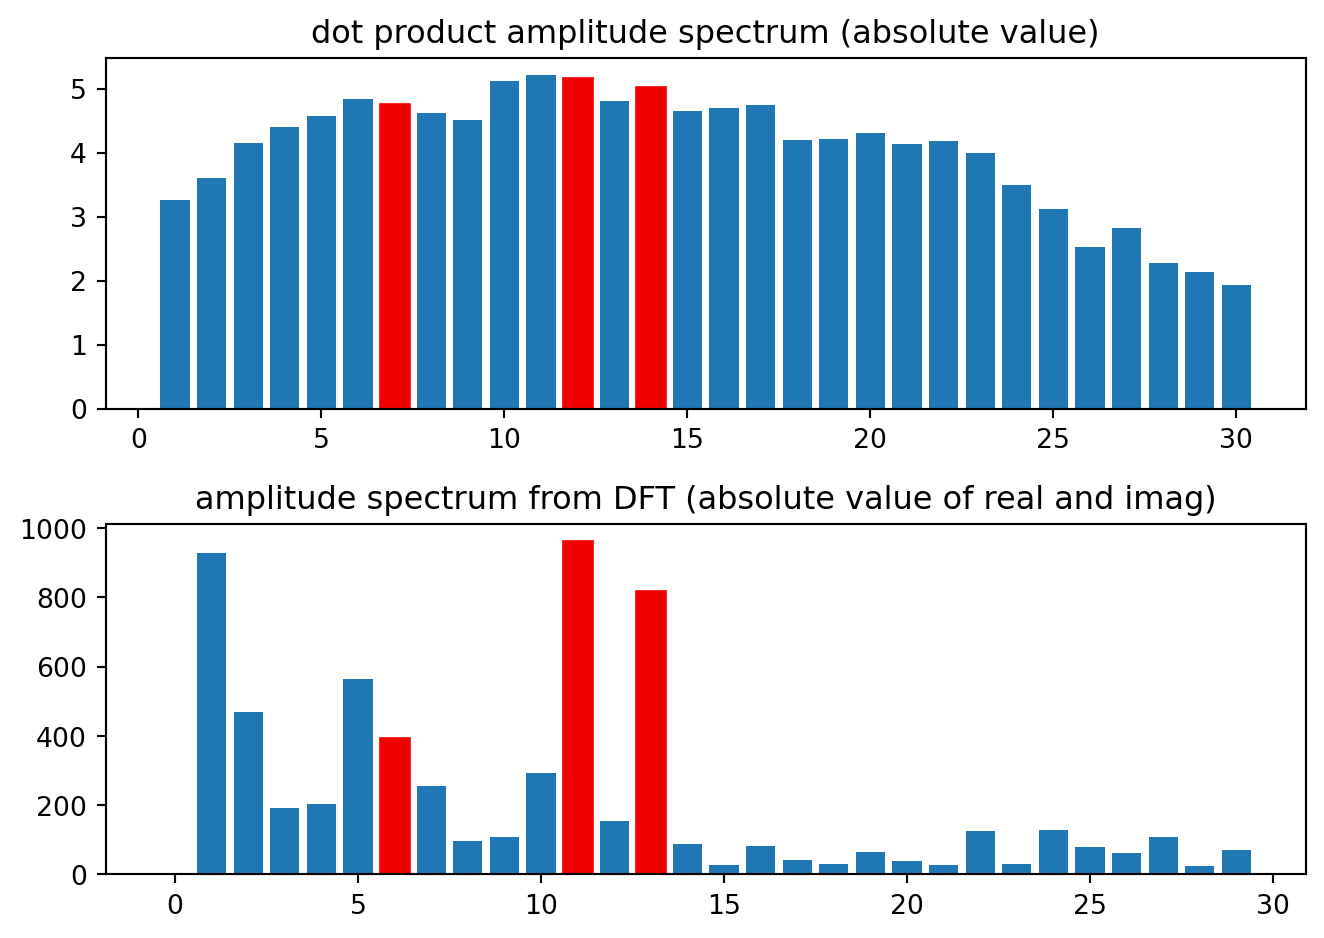

In [12]:
# Plotting
fig, ax = plt.subplots(2, 1)

# Subplot 1
b4 = ax[0].bar(range(1,31), np.abs(dotprodspec[:30]))
ax[0].set_title('dot product amplitude spectrum (absolute value)')

# Set color
for i in [6, 11, 13]:
    b4[i].set_color([0.95,0,0]) # Make the seed frequencies red

# Subplot 2
# Assume faxis is defined
b5 = ax[1].bar(faxis[:30], np.abs(complexspectrum[:30]))
ax[1].set_title('amplitude spectrum from DFT (absolute value of real and imag)')

# Set color
for i in [6, 11, 13]:
    b5[i].set_color([0.95,0,0]) # Make the seed frequencies red

plt.tight_layout()
plt.show()


dotprodspec  = cosdot + 1i*sindot; 
figure
subplot(2,1,1),b4 = bar(1:30, abs(dotprodspec)); title('dot product amplitude spectrum (absolute value)')% the absolute value
b4.FaceColor = 'flat'; b4.CData([6 11 13],:) = [.95 0 0; .95 0 0; .95 0 0]; % this is just to make the seed frequencies red

subplot(2,1,2), b5 = bar(faxis(1:31), abs(complexspectrum(1:31))); title('amplitude spectrum from DFT (absolute value of real and imag)')% the absolute value
b5.FaceColor = 'flat'; b5.CData([7 12 14],:) = [.95 0 0; .95 0 0; .95 0 0]; % this is just to make the seed frequencies red

#--
